In [1]:
print("Pranav")

Pranav


# LINEAR 

In [3]:
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from fbprophet import Prophet
%matplotlib inline

import numpy as np
import seaborn as sb

import warnings;
warnings.simplefilter('ignore')

In [4]:
data_1 = pd.read_csv('C:/Users/prana/Desktop/CS_675_Proj_2/Day.csv', sep=';')
data_1.columns = ['Year','Month','Day','Decimal date','sunspot number','standard deviation','observations','indicator']
data_1.head()

,Year,Month,Day,Decimal date,sunspot number,standard deviation,observations,indicator
0,1818,1,2,1818.004,-1,-1.0,0,1
1,1818,1,3,1818.007,-1,-1.0,0,1
2,1818,1,4,1818.010,-1,-1.0,0,1
3,1818,1,5,1818.012,-1,-1.0,0,1
4,1818,1,6,1818.015,-1,-1.0,0,1


In [5]:
data_1['date'] = data_1['Year'].map(str) + '/' + data_1['Month'].map(str) + '/' + data_1['Day'].map(str)

In [6]:
data_1.head()

,Year,Month,Day,Decimal date,sunspot number,standard deviation,observations,indicator,date
0,1818,1,2,1818.004,-1,-1.0,0,1,1818/1/2
1,1818,1,3,1818.007,-1,-1.0,0,1,1818/1/3
2,1818,1,4,1818.010,-1,-1.0,0,1,1818/1/4
3,1818,1,5,1818.012,-1,-1.0,0,1,1818/1/5
4,1818,1,6,1818.015,-1,-1.0,0,1,1818/1/6


In [7]:
data_1['date'] = pd.to_datetime(data_1['date'], infer_datetime_format=True ,format='%d/%m/%Y')
data_1.tail()

,Year,Month,Day,Decimal date,sunspot number,standard deviation,observations,indicator,date
74198,2021,2,24,2021.149,38,7.2,43,0,2021-02-24
74199,2021,2,25,2021.152,34,5.3,43,0,2021-02-25
74200,2021,2,26,2021.155,19,2.8,45,0,2021-02-26
74201,2021,2,27,2021.158,17,1.6,40,0,2021-02-27
74202,2021,2,28,2021.160,13,3.4,37,0,2021-02-28


In [8]:
# data_1.dtypes

In [9]:
data_1.drop(['Year','Month','Day','Decimal date','standard deviation','observations','indicator'],axis=1,inplace=True)
data_1.columns=['y','ds']

In [10]:
data_1

,y,ds
0,-1,1818-01-02
1,-1,1818-01-03
2,-1,1818-01-04
3,-1,1818-01-05
4,-1,1818-01-06
...,...,...
74198,38,2021-02-24
74199,34,2021-02-25
74200,19,2021-02-26
74201,17,2021-02-27


In [11]:
m = Prophet(interval_width = 0.95,
            n_changepoints=25,
            changepoint_range=0.8,
            changepoint_prior_scale=5,
            daily_seasonality=False)
mdl = m.fit(data_1)

In [15]:
future = m.make_future_dataframe(periods = 365, freq = 'D')
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
74563,2022-02-24,22.528480,-119.024211,170.164506,17.831482,26.793161,0.425821,0.425821,0.425821,0.085916,0.085916,0.085916,0.339906,0.339906,0.339906,0.0,0.0,0.0,22.954301
74564,2022-02-25,22.520811,-122.885224,158.429579,17.807797,26.808667,-0.118863,-0.118863,-0.118863,-0.376008,-0.376008,-0.376008,0.257145,0.257145,0.257145,0.0,0.0,0.0,22.401948
74565,2022-02-26,22.513141,-119.329884,156.982982,17.784112,26.824172,0.306360,0.306360,0.306360,0.145897,0.145897,0.145897,0.160464,0.160464,0.160464,0.0,0.0,0.0,22.819502
74566,2022-02-27,22.505472,-113.370127,153.615536,17.760427,26.839678,-0.053652,-0.053652,-0.053652,-0.105746,-0.105746,-0.105746,0.052094,0.052094,0.052094,0.0,0.0,0.0,22.451820
74567,2022-02-28,22.497802,-114.320295,156.685629,17.736742,26.855184,0.014008,0.014008,0.014008,0.079529,0.079529,0.079529,-0.065521,-0.065521,-0.065521,0.0,0.0,0.0,22.511810


In [13]:
# forecast.tail()

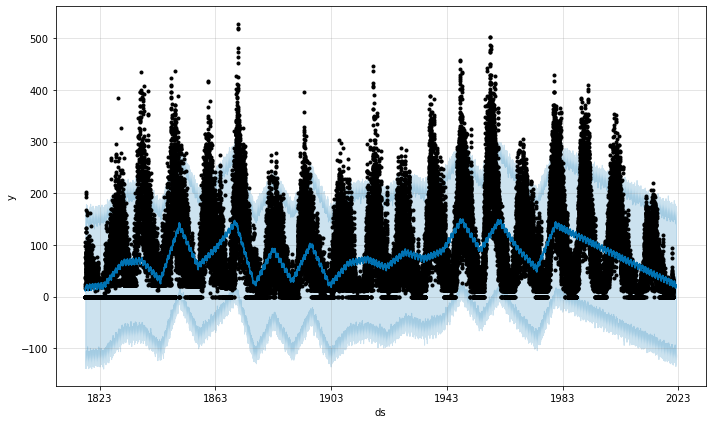

In [14]:
plot_1 = mdl.plot(forecast)

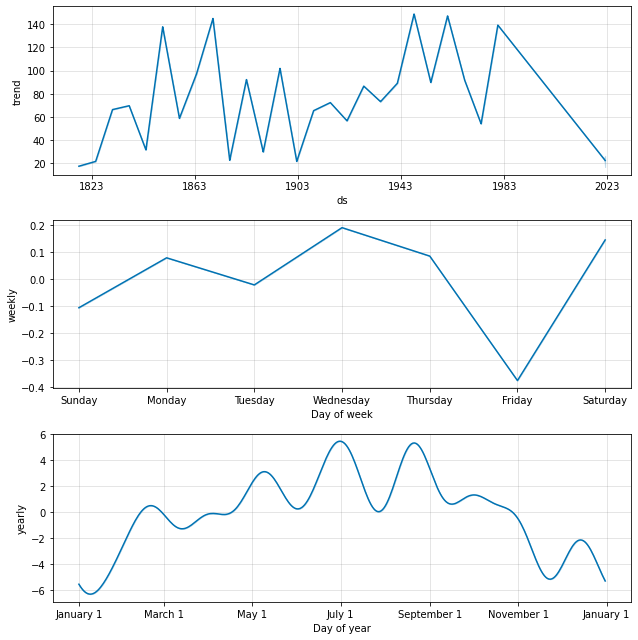

In [14]:
plot_2 = mdl.plot_components(forecast)

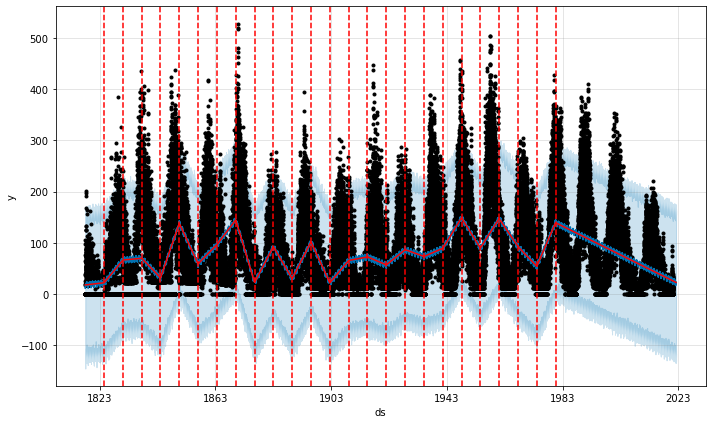

In [17]:
from fbprophet.plot import add_changepoints_to_plot
fig_1 = m.plot(forecast,plot_cap=True, uncertainty=True)
a_2 = add_changepoints_to_plot(fig_1.gca(), m, forecast)

# Cross Validation

In [18]:
from fbprophet.diagnostics import cross_validation

In [21]:
data_1_CV = cross_validation(mdl, initial='72000 days',period='180 days', horizon='365 days', parallel = 'processes')
data_1_CV.head()

INFO:fbprophet:Making 11 forecasts with cutoffs between 2015-03-27 00:00:00 and 2020-02-29 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001A1F7EB5D00>


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-03-28,69.048563,-69.622405,202.909958,81,2015-03-27
1,2015-03-29,68.852639,-73.530123,209.791071,72,2015-03-27
2,2015-03-30,69.104404,-72.261778,204.166926,51,2015-03-27
3,2015-03-31,69.038931,-62.753131,198.180578,38,2015-03-27
4,2015-04-01,69.270895,-70.167500,210.619067,43,2015-03-27


In [22]:
# data_1_CV.tail()

In [23]:
from fbprophet.diagnostics import performance_metrics

In [24]:
data_1_PM = performance_metrics(data_1_CV)
data_1_PM.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,37 days,1447.039675,38.039975,34.939304,2.467023,1.0
1,38 days,1435.872345,37.892906,34.853205,2.555751,1.0
2,39 days,1411.035615,37.563754,34.635452,2.405689,1.0
3,40 days,1387.318499,37.246725,34.461764,2.400199,1.0
4,41 days,1367.023505,36.973281,34.234956,2.327028,1.0


In [26]:
from fbprophet.plot import plot_cross_validation_metric

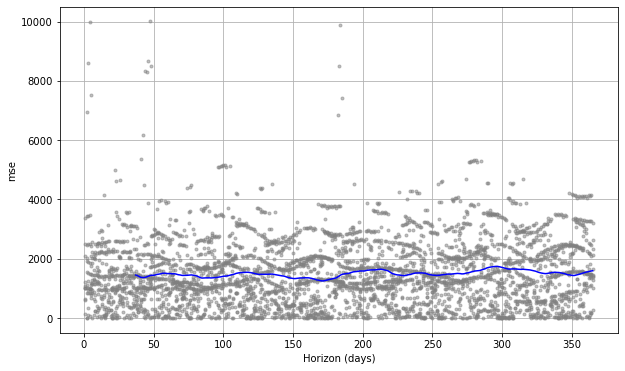

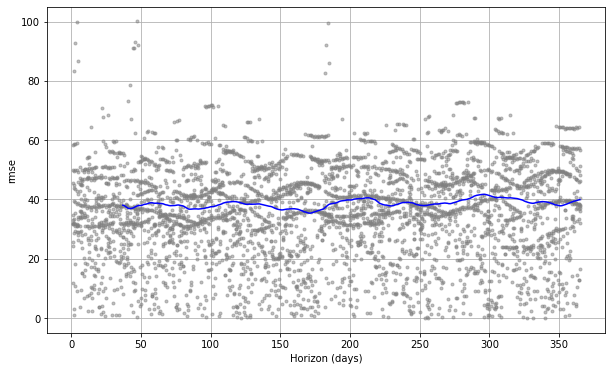

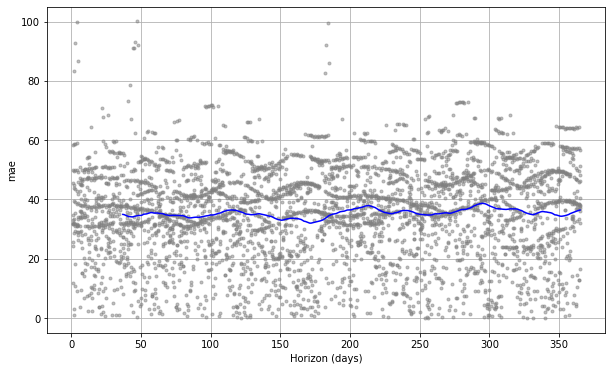

In [27]:
plt_mse = plot_cross_validation_metric(data_1_CV ,metric='mse')
plt_rmse = plot_cross_validation_metric(data_1_CV ,metric='rmse')
plt_mae = plot_cross_validation_metric(data_1_CV ,metric='mae')

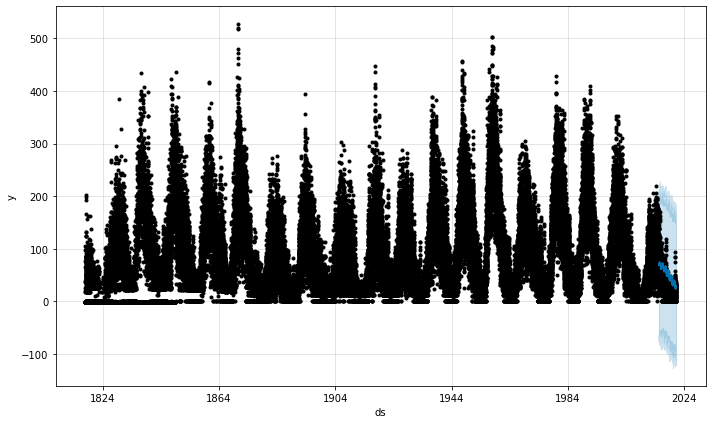

In [28]:
plot_3 = mdl.plot(data_1_CV)

In [31]:
r2_daily = r2_score(data_1_CV['y'],data_1_CV['yhat'])

In [32]:
r2_daily

-1.0278873593870204

In [33]:
print(len(data_1['y']))

74203


# Finding the outliers using IQR

In [34]:
Q1 = np.percentile(data_1['y'], 25)
Q2 = np.percentile(data_1['y'], 50)
Q3 = np.percentile(data_1['y'], 75)
print(Q1)
print(Q2)
print(Q3)

15.0
58.0
123.0


In [35]:
from scipy import stats

In [37]:
IQR = stats.iqr(data_1['y'])
IQR

108.0

In [38]:
low_lim = Q1 - 1.5 * IQR  # LOWER LIMIT
upr_lim = Q3 + 1.5 * IQR  # UPPER LIMIT
print(low_lim)
print(upr_lim)

-147.0
285.0


In [39]:
outlier = []
for i in data_1['y']:
    if ((i>upr_lim or i<low_lim)):
        outlier.append(i)
print('These are the outliers we\'re looking for:', outlier)
print('The number of outliers present are:', len(outlier))

These are the outliers we're looking for: [295, 385, 327, 308, 345, 295, 310, 307, 307, 312, 327, 337, 292, 383, 358, 368, 342, 340, 368, 325, 345, 395, 395, 320, 345, 315, 348, 357, 348, 292, 435, 400, 293, 287, 293, 290, 298, 295, 298, 292, 387, 393, 303, 300, 393, 298, 292, 307, 295, 353, 383, 378, 370, 365, 293, 360, 407, 325, 293, 392, 292, 310, 302, 353, 352, 302, 398, 312, 292, 290, 337, 423, 410, 395, 365, 302, 328, 325, 385, 318, 323, 395, 328, 408, 362, 303, 320, 387, 295, 373, 290, 287, 318, 352, 333, 345, 320, 348, 307, 315, 303, 333, 353, 318, 317, 320, 318, 312, 327, 302, 312, 295, 340, 325, 293, 295, 353, 352, 343, 340, 287, 294, 342, 287, 289, 308, 327, 323, 355, 437, 370, 296, 314, 334, 370, 291, 361, 304, 331, 361, 304, 361, 323, 287, 319, 319, 321, 323, 304, 287, 319, 323, 323, 327, 338, 304, 296, 293, 300, 346, 388, 308, 291, 293, 319, 289, 294, 289, 315, 315, 293, 296, 306, 312, 293, 296, 308, 294, 314, 306, 293, 308, 289, 314, 325, 312, 367, 418, 416, 314, 350, 31

<AxesSubplot:xlabel='y'>

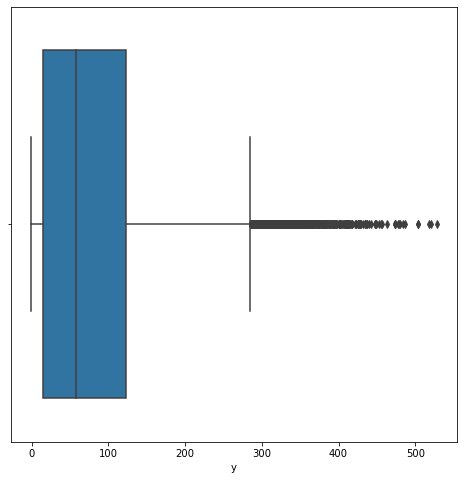

In [41]:
sb.boxplot(data_1['y'])

# LOGISTIC

# 365 DAYS

In [42]:
daily_lg = pd.read_csv('C:/Users/prana/Desktop/CS_675_Proj_2/Day.csv', sep=';')
daily_lg.columns = ['Year','Month','Day','Decimal date','sunspot number','standard deviation','observations','indicator']
daily_lg.head()

,Year,Month,Day,Decimal date,sunspot number,standard deviation,observations,indicator
0,1818,1,2,1818.004,-1,-1.0,0,1
1,1818,1,3,1818.007,-1,-1.0,0,1
2,1818,1,4,1818.010,-1,-1.0,0,1
3,1818,1,5,1818.012,-1,-1.0,0,1
4,1818,1,6,1818.015,-1,-1.0,0,1


In [43]:
daily_lg['date'] = daily_lg['Year'].map(str) + '/' + daily_lg['Month'].map(str) + '/' + daily_lg['Day'].map(str)

In [44]:
daily_lg['date'] = pd.to_datetime(daily_lg['date'], infer_datetime_format=True ,format='%d/%m/%Y')

In [45]:
daily_lg.drop(['Year','Month','Day','Decimal date','standard deviation','observations','indicator'],axis=1,inplace=True)
daily_lg.columns=['y','ds']
daily_lg.head()

,y,ds
0,-1,1818-01-02
1,-1,1818-01-03
2,-1,1818-01-04
3,-1,1818-01-05
4,-1,1818-01-06


In [46]:
m_d_lg = Prophet(growth = 'logistic',
            n_changepoints=25,
            changepoint_prior_scale=5,
            interval_width = 0.95,
            seasonality_mode='additive',
            seasonality_prior_scale=20,
            yearly_seasonality=False,
            weekly_seasonality=False,
            daily_seasonality=False,
           )

In [47]:
m_d_lg.add_seasonality(name = 'daily', period = 365, fourier_order = 10, prior_scale=0.5)

In [48]:
Cap = daily_lg['y'].quantile(0.95)
daily_lg['cap'] = Cap

Floor =daily_lg['y'].quantile(0.05)
daily_lg['floor'] = Floor

mdl_d_lg = m_d_lg.fit(daily_lg)

In [49]:
future_d_lg = m_d_lg.make_future_dataframe(periods = 365, freq = 'D')
future_d_lg['cap'] = Cap
future_d_lg['floor'] = Floor

forecast_d_lg = m_d_lg.predict(future_d_lg)

future_d_lg.head()

,ds,cap,floor
0,1818-01-02,232.0,0.0
1,1818-01-03,232.0,0.0
2,1818-01-04,232.0,0.0
3,1818-01-05,232.0,0.0
4,1818-01-06,232.0,0.0


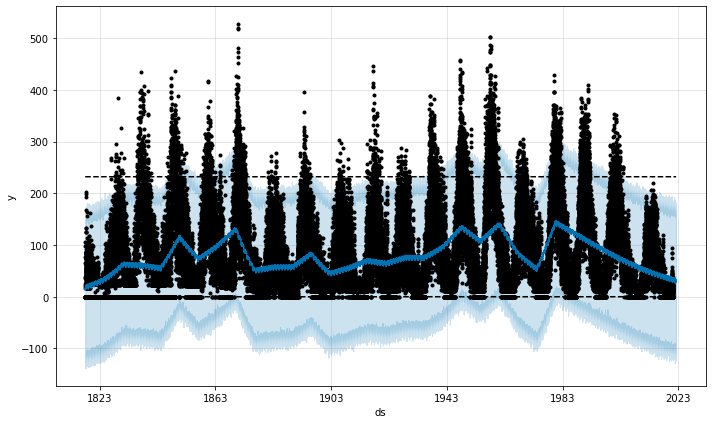

In [50]:
plot_4_d_lg = mdl_d_lg.plot(forecast_d_lg)

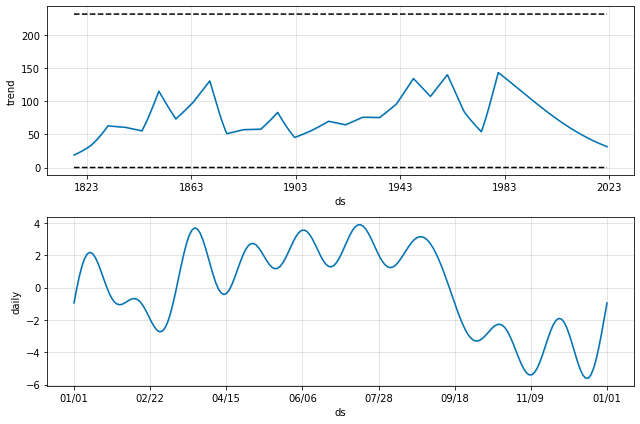

In [51]:
plot_5_d_lg = mdl_d_lg.plot_components(forecast_d_lg)

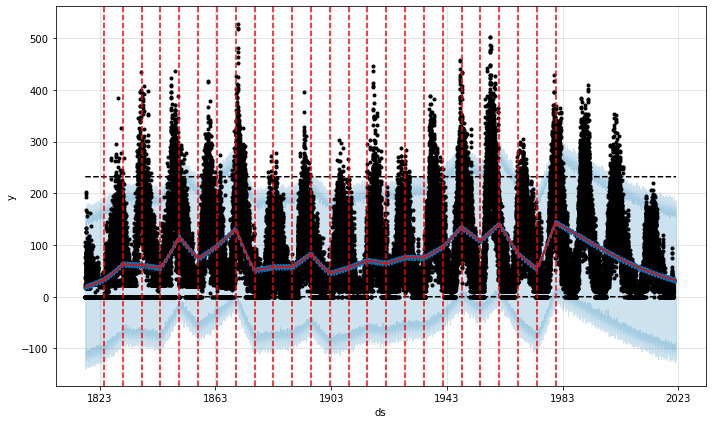

In [52]:
from fbprophet.plot import add_changepoints_to_plot
fig_2_d_lg = m_d_lg.plot(forecast_d_lg,plot_cap=True, uncertainty=True)
a_2_d_lg = add_changepoints_to_plot(fig_2_d_lg.gca(), m_d_lg, forecast_d_lg)

# Cross Validation 365 Days

In [53]:
from fbprophet.diagnostics import cross_validation

In [54]:
CV_d_lg = cross_validation(mdl_d_lg, initial='72900 days',period='180 days', horizon='365 days')
CV_d_lg.head()

INFO:fbprophet:Making 6 forecasts with cutoffs between 2017-09-12 00:00:00 and 2020-02-29 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-09-13,57.706983,-78.616218,186.406453,23,2017-09-12
1,2017-09-14,57.455384,-85.047518,187.158614,12,2017-09-12
2,2017-09-15,57.199326,-81.183179,184.251848,12,2017-09-12
3,2017-09-16,56.940179,-83.217063,202.514649,13,2017-09-12
4,2017-09-17,56.679440,-85.571392,202.066921,14,2017-09-12


In [55]:
from fbprophet.diagnostics import performance_metrics

In [56]:
PM_d_lg = performance_metrics(CV_d_lg)
PM_d_lg.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,37 days,2332.196841,48.292824,46.559386,inf,1.0
1,38 days,2335.679508,48.328868,46.591334,inf,1.0
2,39 days,2331.139111,48.281871,46.542522,inf,1.0
3,40 days,2320.930462,48.176036,46.444977,inf,1.0
4,41 days,2308.708525,48.049022,46.305611,inf,1.0


In [57]:
from fbprophet.plot import plot_cross_validation_metric

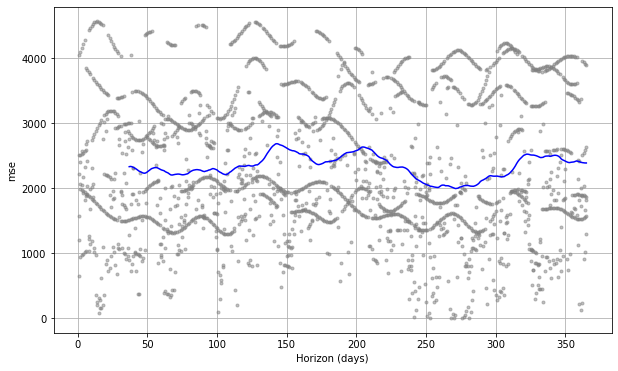

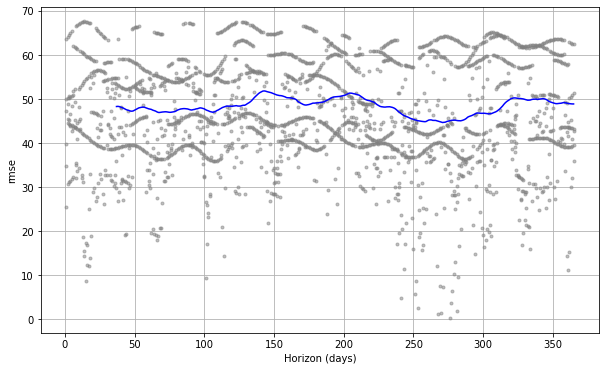

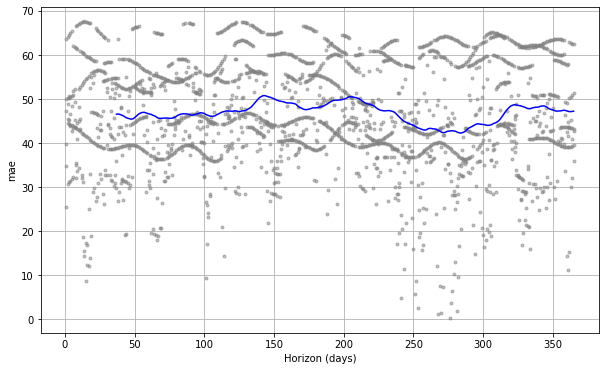

In [58]:
plt_1_mse = plot_cross_validation_metric(CV_d_lg ,metric='mse')
plt_2_rmse = plot_cross_validation_metric(CV_d_lg ,metric='rmse')
plt_3_mae = plot_cross_validation_metric(CV_d_lg ,metric='mae')

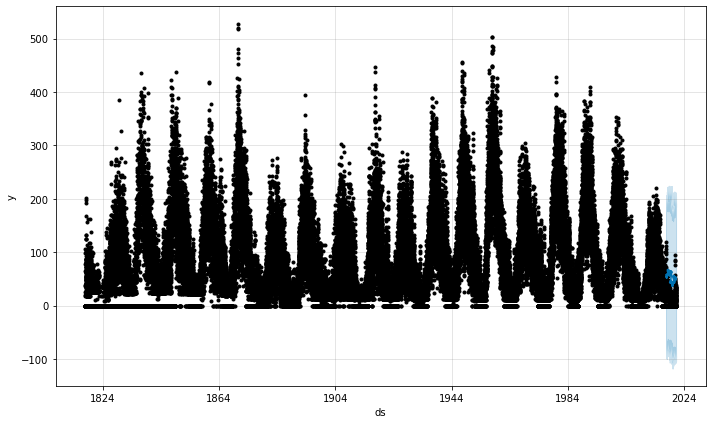

In [59]:
plot_6_d_lg = mdl_d_lg.plot(CV_d_lg)

# 200 Days

In [63]:
daily_lg_2h = pd.read_csv('C:/Users/prana/Desktop/CS_675_Proj_2/Day.csv', sep=';')
daily_lg_2h.columns = ['Year','Month','Day','Decimal date','sunspot number','standard deviation','observations','indicator']

In [64]:
daily_lg_2h['date'] = daily_lg_2h['Year'].map(str) + '/' + daily_lg_2h['Month'].map(str) + '/' + daily_lg_2h['Day'].map(str)

In [65]:
daily_lg_2h['date'] = pd.to_datetime(daily_lg_2h['date'], infer_datetime_format=True ,format='%d/%m/%Y')

In [66]:
daily_lg_2h.drop(['Year','Month','Day','Decimal date','standard deviation','observations','indicator'],axis=1,inplace=True)
daily_lg_2h.columns=['y','ds']

In [67]:
m_d_lg_2h = Prophet(growth = 'logistic',
            n_changepoints=25,
            changepoint_prior_scale=5,
            interval_width = 0.95,
            seasonality_mode='additive',
            seasonality_prior_scale=20,
            yearly_seasonality=False,
            weekly_seasonality=False,
            daily_seasonality=False,
           )

In [68]:
m_d_lg_2h.add_seasonality(name = 'daily', period = 365, fourier_order = 5, prior_scale=0.5)

In [69]:
Cap = daily_lg_2h['y'].quantile(0.95)
daily_lg_2h['cap'] = Cap

Floor =daily_lg_2h['y'].quantile(0.05)
daily_lg_2h['floor'] = Floor

mdl_d_lg_2h = m_d_lg_2h.fit(daily_lg_2h)

In [70]:
future_d_lg_2h = m_d_lg_2h.make_future_dataframe(periods = 200, freq = 'D')
future_d_lg_2h['cap'] = Cap
future_d_lg_2h['floor'] = Floor

forecast_d_lg_2h = m_d_lg.predict(future_d_lg_2h)

future_d_lg_2h.head()

,ds,cap,floor
0,1818-01-02,232.0,0.0
1,1818-01-03,232.0,0.0
2,1818-01-04,232.0,0.0
3,1818-01-05,232.0,0.0
4,1818-01-06,232.0,0.0


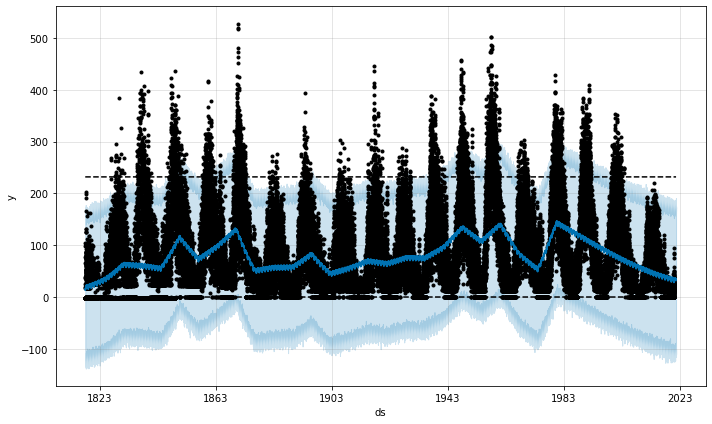

In [71]:
plot_8_d_lg_2h = mdl_d_lg_2h.plot(forecast_d_lg_2h)

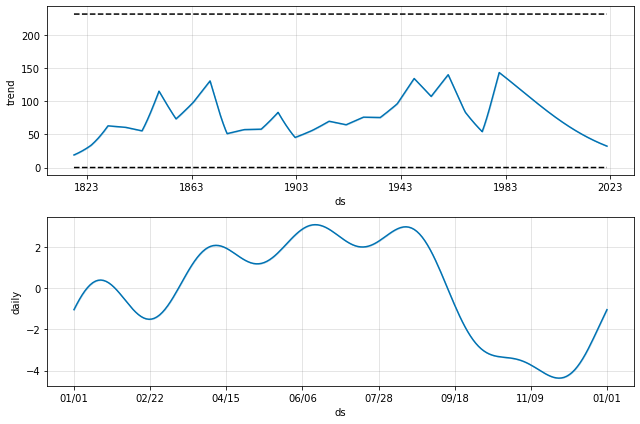

In [72]:
plot_9_d_lg_2h = mdl_d_lg_2h.plot_components(forecast_d_lg_2h)

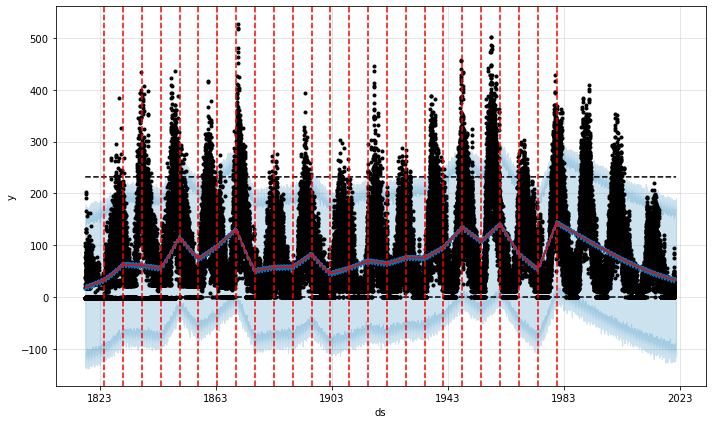

In [73]:
from fbprophet.plot import add_changepoints_to_plot
fig_5_d_lg_2h = m_d_lg_2h.plot(forecast_d_lg_2h,plot_cap=True, uncertainty=True)
a_5_d_lg_2h = add_changepoints_to_plot(fig_5_d_lg_2h.gca(), m_d_lg_2h, forecast_d_lg_2h)

# Cross Validation 200 Days

In [74]:
from fbprophet.diagnostics import cross_validation

In [75]:
CV_d_lg_2h = cross_validation(mdl_d_lg_2h, initial='72900 days',period='100 days', horizon='200 days', parallel = 'processes')
CV_d_lg_2h.head()

INFO:fbprophet:Making 12 forecasts with cutoffs between 2017-08-08 00:00:00 and 2020-08-12 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001A1912ABD90>


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-08-09,60.130193,-73.825785,198.060300,12,2017-08-08
1,2017-08-10,60.162823,-81.861041,196.445729,14,2017-08-08
2,2017-08-11,60.191247,-72.903499,198.295685,12,2017-08-08
3,2017-08-12,60.214963,-70.487986,198.189348,13,2017-08-08
4,2017-08-13,60.233490,-76.483944,199.553868,12,2017-08-08


In [76]:
from fbprophet.diagnostics import performance_metrics

In [77]:
PM_d_lg_2h = performance_metrics(CV_d_lg_2h)
PM_d_lg_2h.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,20 days,2035.649499,45.118173,43.390609,inf,1.0
1,21 days,2025.103806,45.001153,43.312517,inf,1.0
2,22 days,2028.462755,45.038459,43.317019,inf,1.0
3,23 days,2033.361645,45.092811,43.347113,inf,1.0
4,24 days,2032.505062,45.083312,43.250094,inf,1.0


In [78]:
from fbprophet.plot import plot_cross_validation_metric

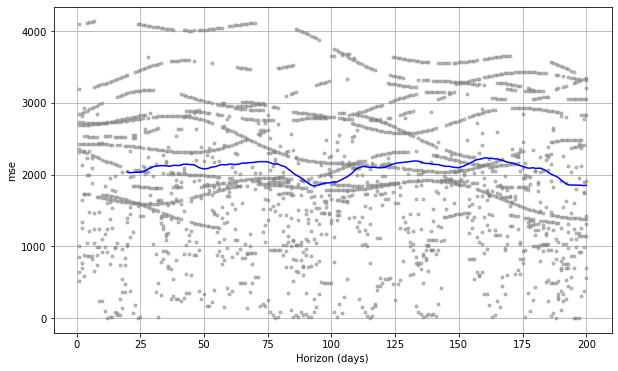

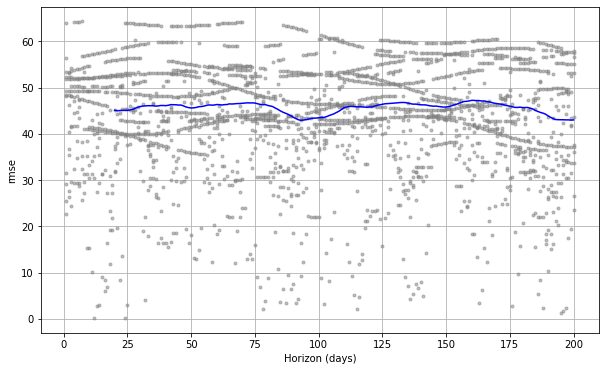

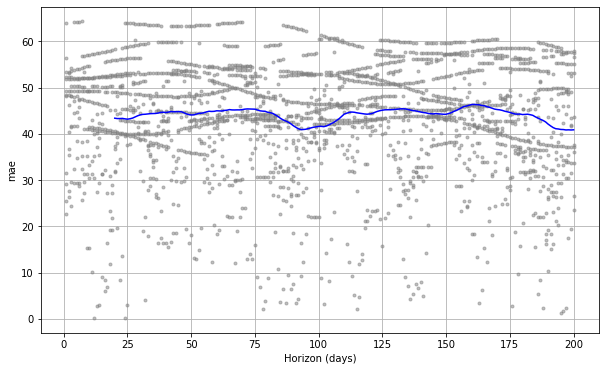

In [79]:
plt_2h_mse = plot_cross_validation_metric(CV_d_lg_2h ,metric='mse')
plt_2h_rmse = plot_cross_validation_metric(CV_d_lg_2h ,metric='rmse')
plt_2h_mae = plot_cross_validation_metric(CV_d_lg_2h ,metric='mae')

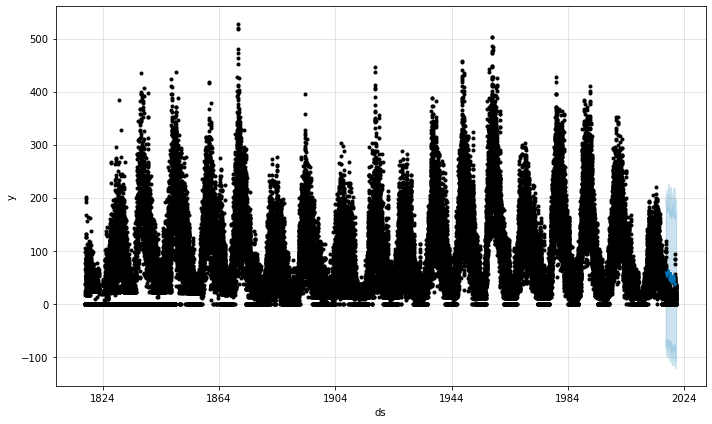

In [80]:
plot_10_d_lg_2h = mdl_d_lg.plot(CV_d_lg_2h)

# 100 Days

In [81]:
daily_lg_1h = pd.read_csv('C:/Users/prana/Desktop/CS_675_Proj_2/Day.csv', sep=';')
daily_lg_1h.columns = ['Year','Month','Day','Decimal date','sunspot number','standard deviation','observations','indicator']

In [83]:
daily_lg_1h['date'] = daily_lg_1h['Year'].map(str) + '/' + daily_lg_1h['Month'].map(str) + '/' + daily_lg_1h['Day'].map(str)

In [84]:
daily_lg_1h['date'] = pd.to_datetime(daily_lg_1h['date'], infer_datetime_format=True ,format='%d/%m/%Y')

In [85]:
daily_lg_1h.drop(['Year','Month','Day','Decimal date','standard deviation','observations','indicator'],axis=1,inplace=True)
daily_lg_1h.columns=['y','ds']

In [86]:
m_d_lg_1h = Prophet(growth = 'logistic',
            n_changepoints=25,
            changepoint_prior_scale=5,
            interval_width = 0.95,
            seasonality_mode='additive',
            seasonality_prior_scale=20,
            yearly_seasonality=False,
            weekly_seasonality=False,
            daily_seasonality=False,
           )

In [87]:
m_d_lg_1h.add_seasonality(name = 'daily', period = 365, fourier_order = 10, prior_scale=0.5)

In [88]:
Cap = daily_lg_1h['y'].quantile(0.95)
daily_lg_1h['cap'] = Cap

Floor =daily_lg_1h['y'].quantile(0.05)        #Cap and floor needs to be set
daily_lg_1h['floor'] = Floor

mdl_d_lg_1h = m_d_lg_1h.fit(daily_lg_1h)

In [89]:
future_d_lg_1h = m_d_lg_1h.make_future_dataframe(periods = 100, freq = 'D')
future_d_lg_1h['cap'] = Cap
future_d_lg_1h['floor'] = Floor

forecast_d_lg_1h = m_d_lg_1h.predict(future_d_lg_1h)

future_d_lg_1h.head()

,ds,cap,floor
0,1818-01-02,232.0,0.0
1,1818-01-03,232.0,0.0
2,1818-01-04,232.0,0.0
3,1818-01-05,232.0,0.0
4,1818-01-06,232.0,0.0


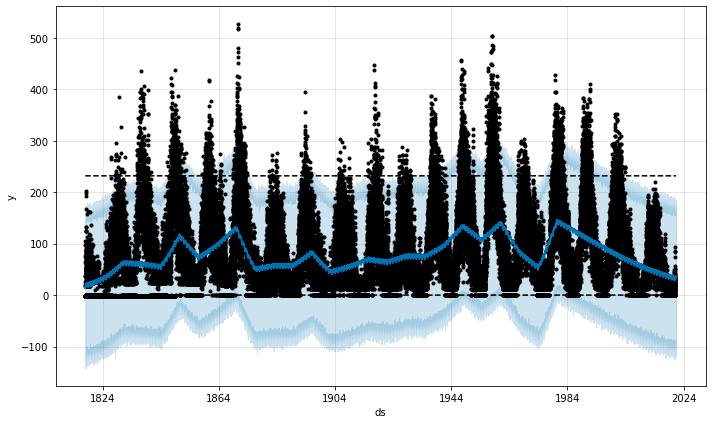

In [90]:
plot_10_d_lg_1h = m_d_lg_1h.plot(forecast_d_lg_1h)

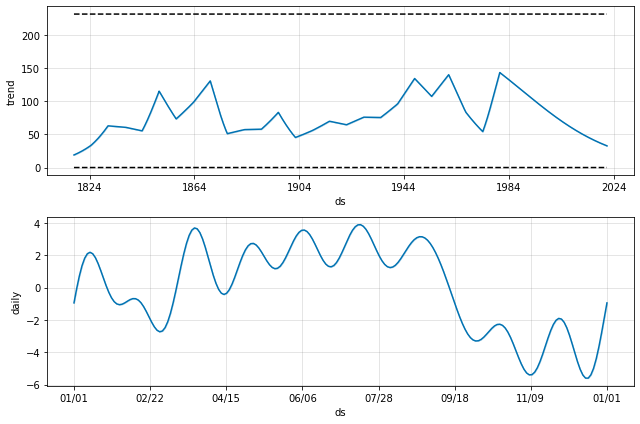

In [91]:
plot_11_d_lg_1h = mdl_d_lg_1h.plot_components(forecast_d_lg_1h)

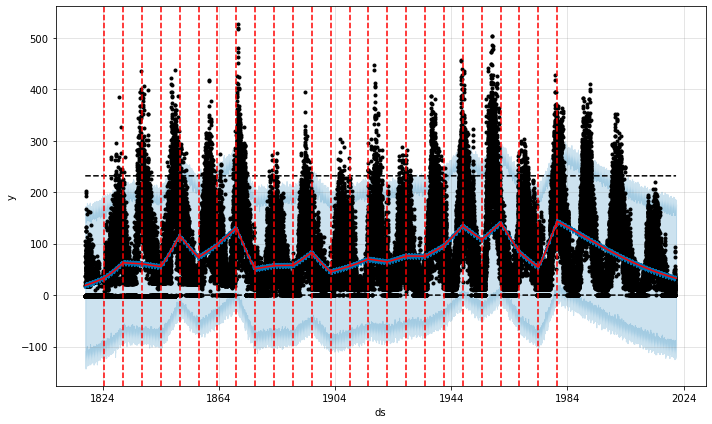

In [93]:
from fbprophet.plot import add_changepoints_to_plot
fig_6_d_lg_1h = m_d_lg_1h.plot(forecast_d_lg_1h,plot_cap=True, uncertainty=True)
a_6_d_lg_1h = add_changepoints_to_plot(fig_6_d_lg_1h.gca(), m_d_lg_1h, forecast_d_lg_1h)

# Cross Validation 100 Days

In [94]:
from fbprophet.diagnostics import cross_validation

In [101]:
CV_d_lg_1h = cross_validation(mdl_d_lg_1h, initial='73500 days',period='50 days', horizon='100 days')
CV_d_lg_1h.head()

INFO:fbprophet:Making 13 forecasts with cutoffs between 2019-03-31 00:00:00 and 2020-11-20 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-04-01,47.487741,-97.649356,186.593694,14,2019-03-31
1,2019-04-02,47.180327,-97.102350,179.576542,17,2019-03-31
2,2019-04-03,46.860587,-88.814540,197.120185,19,2019-03-31
3,2019-04-04,46.536791,-86.315237,171.417079,11,2019-03-31
4,2019-04-05,46.217161,-93.876688,182.676953,5,2019-03-31


In [102]:
from fbprophet.diagnostics import performance_metrics

In [103]:
PM_d_lg_1h = performance_metrics(CV_d_lg_1h)
PM_d_lg_1h.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,10 days,2242.826008,47.358484,45.760846,inf,1.0
1,11 days,2244.438680,47.375507,45.865210,inf,1.0
2,12 days,2252.541443,47.460947,46.050972,inf,1.0
3,13 days,2250.931534,47.443983,46.037924,inf,1.0
4,14 days,2253.673381,47.472870,46.041674,inf,1.0


In [104]:
from fbprophet.plot import plot_cross_validation_metric

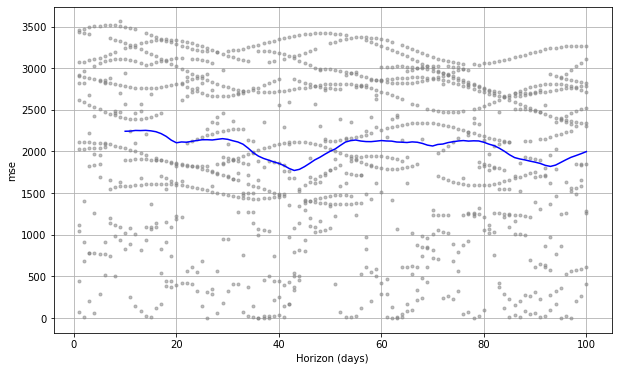

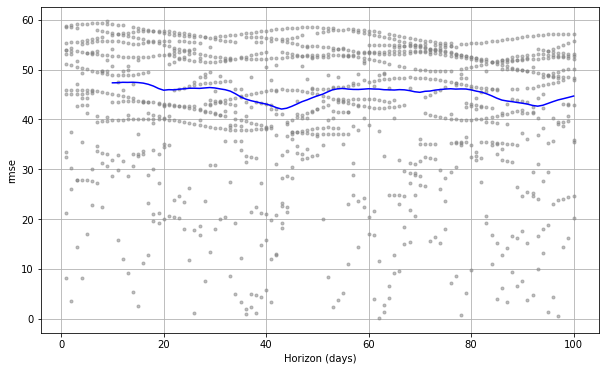

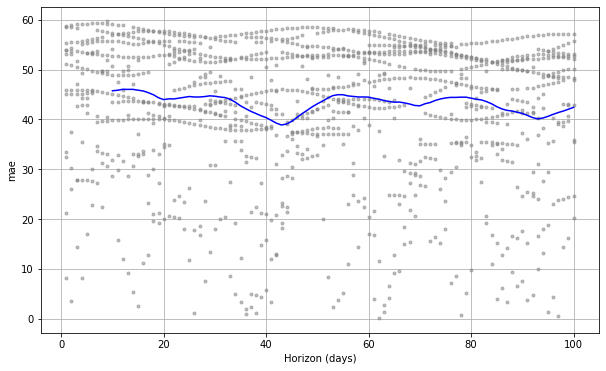

In [106]:
plt_1h_mse = plot_cross_validation_metric(CV_d_lg_1h ,metric='mse')
plt_1h_rmse = plot_cross_validation_metric(CV_d_lg_1h ,metric='rmse')
plt_1h_mae = plot_cross_validation_metric(CV_d_lg_1h ,metric='mae')

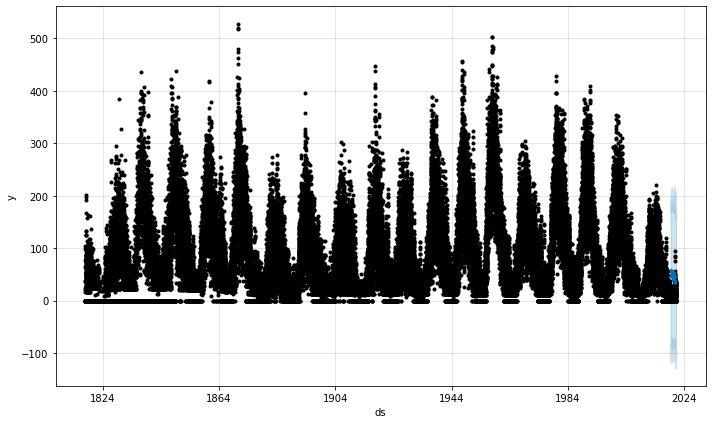

In [107]:
plot_12_d_lg_1h = mdl_d_lg_1h.plot(CV_d_lg_1h)